<a href="https://colab.research.google.com/github/minyoung347/python101/blob/main/5_4_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 머신 러닝의 기본 요소

## 일반화: 머신 러닝의 목표

### 과소적합과 과대적합

#### 잡음 섞인 훈련 데이터

#### 불확실한 특성

#### 드문 특성과 가짜 상관관계

**MNIST에 백색 잡음 픽셀과 0 픽셀을 추가하기**

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11490434/11490434 [==============================] - 0s 0us/step


In [2]:
train_images_with_noise_channels.shape

(60000, 1568)

**백색 잡음과 0을 추가한 MNIST 데이터에서 모델 훈련하기**

In [3]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 9s 6ms/step - loss: 0.6173 - accuracy: 0.8155 - val_loss: 0.2682 - val_accuracy: 0.9211
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.2580 - accuracy: 0.9212 - val_loss: 0.2098 - val_accuracy: 0.9389
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1705 - accuracy: 0.9481 - val_loss: 0.1627 - val_accuracy: 0.9521
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1237 - accuracy: 0.9613 - val_loss: 0.1277 - val_accuracy: 0.9618
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0924 - accuracy: 0.9706 - val_loss: 0.1334 - val_accuracy: 0.9618
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0666 - accuracy: 0.9789 - val_loss: 0.1367 - val_accuracy: 0.9605
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0486 - accuracy: 0.9840 - val_loss: 0.1474 - val_accuracy: 0.9583
Epoch 

**검증 정확도 비교 그래프 그리기**

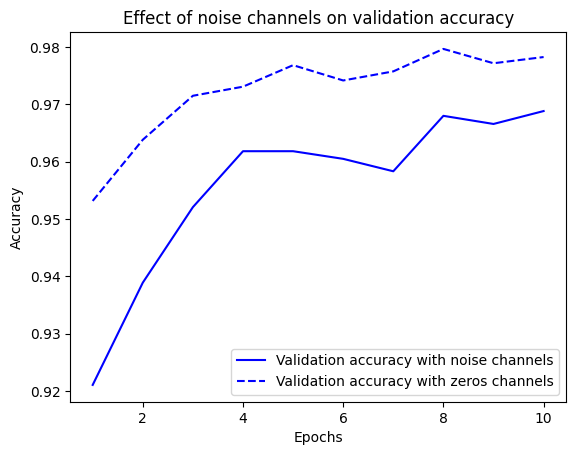

In [4]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### 딥러닝에서 일반화의 본질

**랜덤하게 섞은 레이블로 MNIST 모델 훈련하기**

In [5]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 3s 5ms/step - loss: 2.3154 - accuracy: 0.1041 - val_loss: 2.3065 - val_accuracy: 0.1047
Epoch 2/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2996 - accuracy: 0.1167 - val_loss: 2.3080 - val_accuracy: 0.1050
Epoch 3/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2916 - accuracy: 0.1285 - val_loss: 2.3161 - val_accuracy: 0.1078
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2795 - accuracy: 0.1404 - val_loss: 2.3235 - val_accuracy: 0.1051
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2638 - accuracy: 0.1542 - val_loss: 2.3290 - val_accuracy: 0.1076
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2450 - accuracy: 0.1652 - val_loss: 2.3522 - val_accuracy: 0.1063
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2210 - accuracy: 0.1812 - val_loss: 2.3526 - val_accuracy: 0.1060

#### 매니폴드 가설

#### 일반화의 원천인 보간

#### 딥러닝이 작동하는 이유

#### 가장 중요한 훈련 데이터

## 머신 러닝 모델 평가

### 훈련, 검증, 테스트 세트

#### 단순 홀드아웃 검증

#### K-겹 교차 검증

#### 셔플링을 사용한 반복 K-겹 교차 검증

### 상식 수준의 기준점을 넘기

### 모델 평가에 대해 유념해야 할 점

## 훈련 성능 향상하기

### 경사 하강법의 핵심 파라미터 튜닝하기

**잘못된 높은 학습률로 MNIST 모델 훈련하기**

In [6]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 704.7464 - accuracy: 0.3705 - val_loss: 2.2678 - val_accuracy: 0.2363
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 2.9987 - accuracy: 0.2389 - val_loss: 7.9910 - val_accuracy: 0.1877
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 3.4859 - accuracy: 0.2170 - val_loss: 2.1449 - val_accuracy: 0.2298
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 2.5519 - accuracy: 0.2115 - val_loss: 2.1546 - val_accuracy: 0.2107
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 2.3777 - accuracy: 0.1958 - val_loss: 2.2041 - val_accuracy: 0.2007
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 2.4021 - accuracy: 0.1849 - val_loss: 2.1853 - val_accuracy: 0.2447
Epoch 7/10
375/375 [==============================] - 1s 4ms/step - loss: 2.2682 - accuracy: 0.2150 - val_loss: 2.1560 - val_accuracy: 0.2067
Epoc

**같은 모델을 적절한 학습률로 훈련하기**

In [7]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 3s 4ms/step - loss: 0.3508 - accuracy: 0.9112 - val_loss: 0.1416 - val_accuracy: 0.9601
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1261 - accuracy: 0.9646 - val_loss: 0.1311 - val_accuracy: 0.9667
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0951 - accuracy: 0.9738 - val_loss: 0.1221 - val_accuracy: 0.9729
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0788 - accuracy: 0.9802 - val_loss: 0.1984 - val_accuracy: 0.9617
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0671 - accuracy: 0.9835 - val_loss: 0.1592 - val_accuracy: 0.9712
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0576 - accuracy: 0.9851 - val_loss: 0.1945 - val_accuracy: 0.9678
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0499 - accuracy: 0.9881 - val_loss: 0.2327 - val_accuracy: 0.9688
Epoch 

### 구조에 대해 더 나은 가정하기

### 모델 용량 늘리기

**MNIST 데이터를 사용한 간단한 로지스틱 회귀 모델**

In [8]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.6614 - accuracy: 0.8375 - val_loss: 0.3585 - val_accuracy: 0.9027
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3527 - accuracy: 0.9021 - val_loss: 0.3103 - val_accuracy: 0.9136
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3184 - accuracy: 0.9114 - val_loss: 0.2929 - val_accuracy: 0.9174
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3023 - accuracy: 0.9147 - val_loss: 0.2831 - val_accuracy: 0.9205
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2923 - accuracy: 0.9184 - val_loss: 0.2774 - val_accuracy: 0.9239
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2855 - accuracy: 0.9202 - val_loss: 0.2741 - val_accuracy: 0.9236
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2805 - accuracy: 0.9214 - val_loss: 0.2721 - val_accuracy: 0.9260
Epoch 

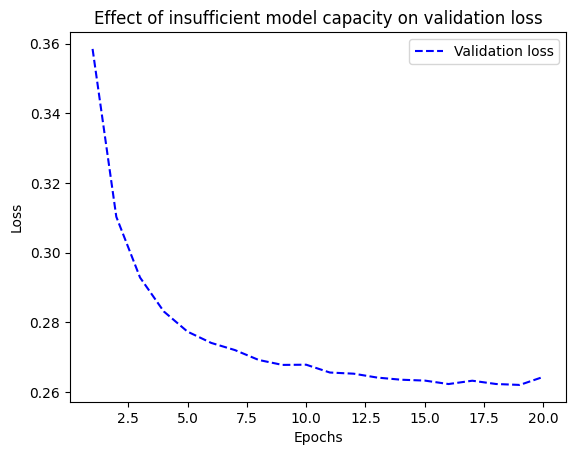

In [9]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [10]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.3636 - accuracy: 0.8972 - val_loss: 0.1870 - val_accuracy: 0.9458
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1634 - accuracy: 0.9509 - val_loss: 0.1329 - val_accuracy: 0.9602
Epoch 3/20
375/375 [==============================] - 2s 4ms/step - loss: 0.1167 - accuracy: 0.9646 - val_loss: 0.1131 - val_accuracy: 0.9652
Epoch 4/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0887 - accuracy: 0.9724 - val_loss: 0.1040 - val_accuracy: 0.9707
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0702 - accuracy: 0.9785 - val_loss: 0.1003 - val_accuracy: 0.9702
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0578 - accuracy: 0.9817 - val_loss: 0.0929 - val_accuracy: 0.9740
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0481 - accuracy: 0.9850 - val_loss: 0.0923 - val_accuracy: 0.9737
Epoch 

## 일반화 성능 향상하기

### 데이터셋 큐레이션

### 특성 공학

### 조기 종료 사용하기

### 모델 규제하기

#### 네트워크 크기 축소

**원본 모델**

In [11]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

17464789/17464789 [==============================] - 0s 0us/step
Epoch 1/20
30/30 [==============================] - 3s 54ms/step - loss: 0.6052 - accuracy: 0.6677 - val_loss: 0.4958 - val_accuracy: 0.8109
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.4040 - accuracy: 0.8754 - val_loss: 0.3587 - val_accuracy: 0.8832
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2891 - accuracy: 0.9090 - val_loss: 0.3062 - val_accuracy: 0.8874
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2247 - accuracy: 0.9286 - val_loss: 0.3045 - val_accuracy: 0.8791
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1851 - accuracy: 0.9399 - val_loss: 0.2773 - val_accuracy: 0.8907
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1572 - accuracy: 0.9492 - val_loss: 0.2783 - val_accuracy: 0.8907
Epoch 7/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1322 - accurac

**작은 용량의 모델**

In [12]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 54ms/step - loss: 0.6332 - accuracy: 0.6138 - val_loss: 0.5796 - val_accuracy: 0.6840
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.5445 - accuracy: 0.7747 - val_loss: 0.5261 - val_accuracy: 0.8092
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.4917 - accuracy: 0.8449 - val_loss: 0.4905 - val_accuracy: 0.8381
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.4515 - accuracy: 0.8817 - val_loss: 0.4638 - val_accuracy: 0.8673
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.4180 - accuracy: 0.9035 - val_loss: 0.4426 - val_accuracy: 0.8662
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3862 - accuracy: 0.9221 - val_loss: 0.4225 - val_accuracy: 0.8712
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3551 - accuracy: 0.9359 - val_loss: 0.3988 - val_accuracy: 0.8881
Epoch 8/20
30

**큰 용량의 모델**

In [13]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 57ms/step - loss: 0.5666 - accuracy: 0.7082 - val_loss: 0.3856 - val_accuracy: 0.8372
Epoch 2/20
30/30 [==============================] - 1s 27ms/step - loss: 0.3223 - accuracy: 0.8647 - val_loss: 0.2869 - val_accuracy: 0.8815
Epoch 3/20
30/30 [==============================] - 1s 27ms/step - loss: 0.2348 - accuracy: 0.9115 - val_loss: 0.4342 - val_accuracy: 0.8208
Epoch 4/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1858 - accuracy: 0.9289 - val_loss: 0.3126 - val_accuracy: 0.8779
Epoch 5/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1490 - accuracy: 0.9475 - val_loss: 0.3091 - val_accuracy: 0.8860
Epoch 6/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1114 - accuracy: 0.9591 - val_loss: 0.2866 - val_accuracy: 0.8880
Epoch 7/20
30/30 [==============================] - 1s 28ms/step - loss: 0.0811 - accuracy: 0.9743 - val_loss: 0.3305 - val_accuracy: 0.8847
Epoch 8/20
30

#### 가중치 규제 추가하기

**모델에 L2 가중치 추가하기**

In [14]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 53ms/step - loss: 0.6246 - accuracy: 0.7769 - val_loss: 0.5054 - val_accuracy: 0.8563
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.4252 - accuracy: 0.8911 - val_loss: 0.4004 - val_accuracy: 0.8826
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3399 - accuracy: 0.9137 - val_loss: 0.3832 - val_accuracy: 0.8762
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3021 - accuracy: 0.9217 - val_loss: 0.3547 - val_accuracy: 0.8885
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2785 - accuracy: 0.9289 - val_loss: 0.3531 - val_accuracy: 0.8867
Epoch 6/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2564 - accuracy: 0.9413 - val_loss: 0.3512 - val_accuracy: 0.8861
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2477 - accuracy: 0.9426 - val_loss: 0.3678 - val_accuracy: 0.8818
Epoch 8/20
30

**케라스에서 사용할 수 있는 가중치 규제**

In [15]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### 드롭아웃 추가

**IMDB 모델에 드롭아웃 추가하기**

In [16]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 53ms/step - loss: 0.6489 - accuracy: 0.6125 - val_loss: 0.5486 - val_accuracy: 0.8080
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.5327 - accuracy: 0.7443 - val_loss: 0.4282 - val_accuracy: 0.8618
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.4510 - accuracy: 0.8065 - val_loss: 0.3572 - val_accuracy: 0.8783
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3877 - accuracy: 0.8421 - val_loss: 0.3425 - val_accuracy: 0.8644
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3459 - accuracy: 0.8671 - val_loss: 0.2915 - val_accuracy: 0.8861
Epoch 6/20
30/30 [==============================] - 1s 40ms/step - loss: 0.2980 - accuracy: 0.8939 - val_loss: 0.2798 - val_accuracy: 0.8876
Epoch 7/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2696 - accuracy: 0.9057 - val_loss: 0.2742 - val_accuracy: 0.8924
Epoch 8/20
30

## 요약